# Projet Machine-Learning par Antoine Théologien & Célian Vasson
## Test d'un réseau de neurones à deux couches

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *


def train_nn(X, y, model, loss, epochs=1000, lr=0.1, batch_size=16):
    losses = []
    n = X.shape[0]  
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)  
        X_shuffled, y_shuffled = X[indices], y[indices]

        epoch_loss = 0
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_hat))
            epoch_loss += batch_loss * len(X_batch) / n 

            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)

        losses.append(epoch_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model



Epoch 0: Loss = 0.0945
Epoch 100: Loss = 0.0004
Epoch 200: Loss = 0.0002
Epoch 300: Loss = 0.0001
Epoch 400: Loss = 0.0001
Epoch 0: Loss = 0.2439
Epoch 100: Loss = 0.0103
Epoch 200: Loss = 0.0081
Epoch 300: Loss = 0.0071
Epoch 400: Loss = 0.0066
Epoch 0: Loss = 0.3800
Epoch 100: Loss = 0.2449
Epoch 200: Loss = 0.2430
Epoch 300: Loss = 0.2417
Epoch 400: Loss = 0.2406


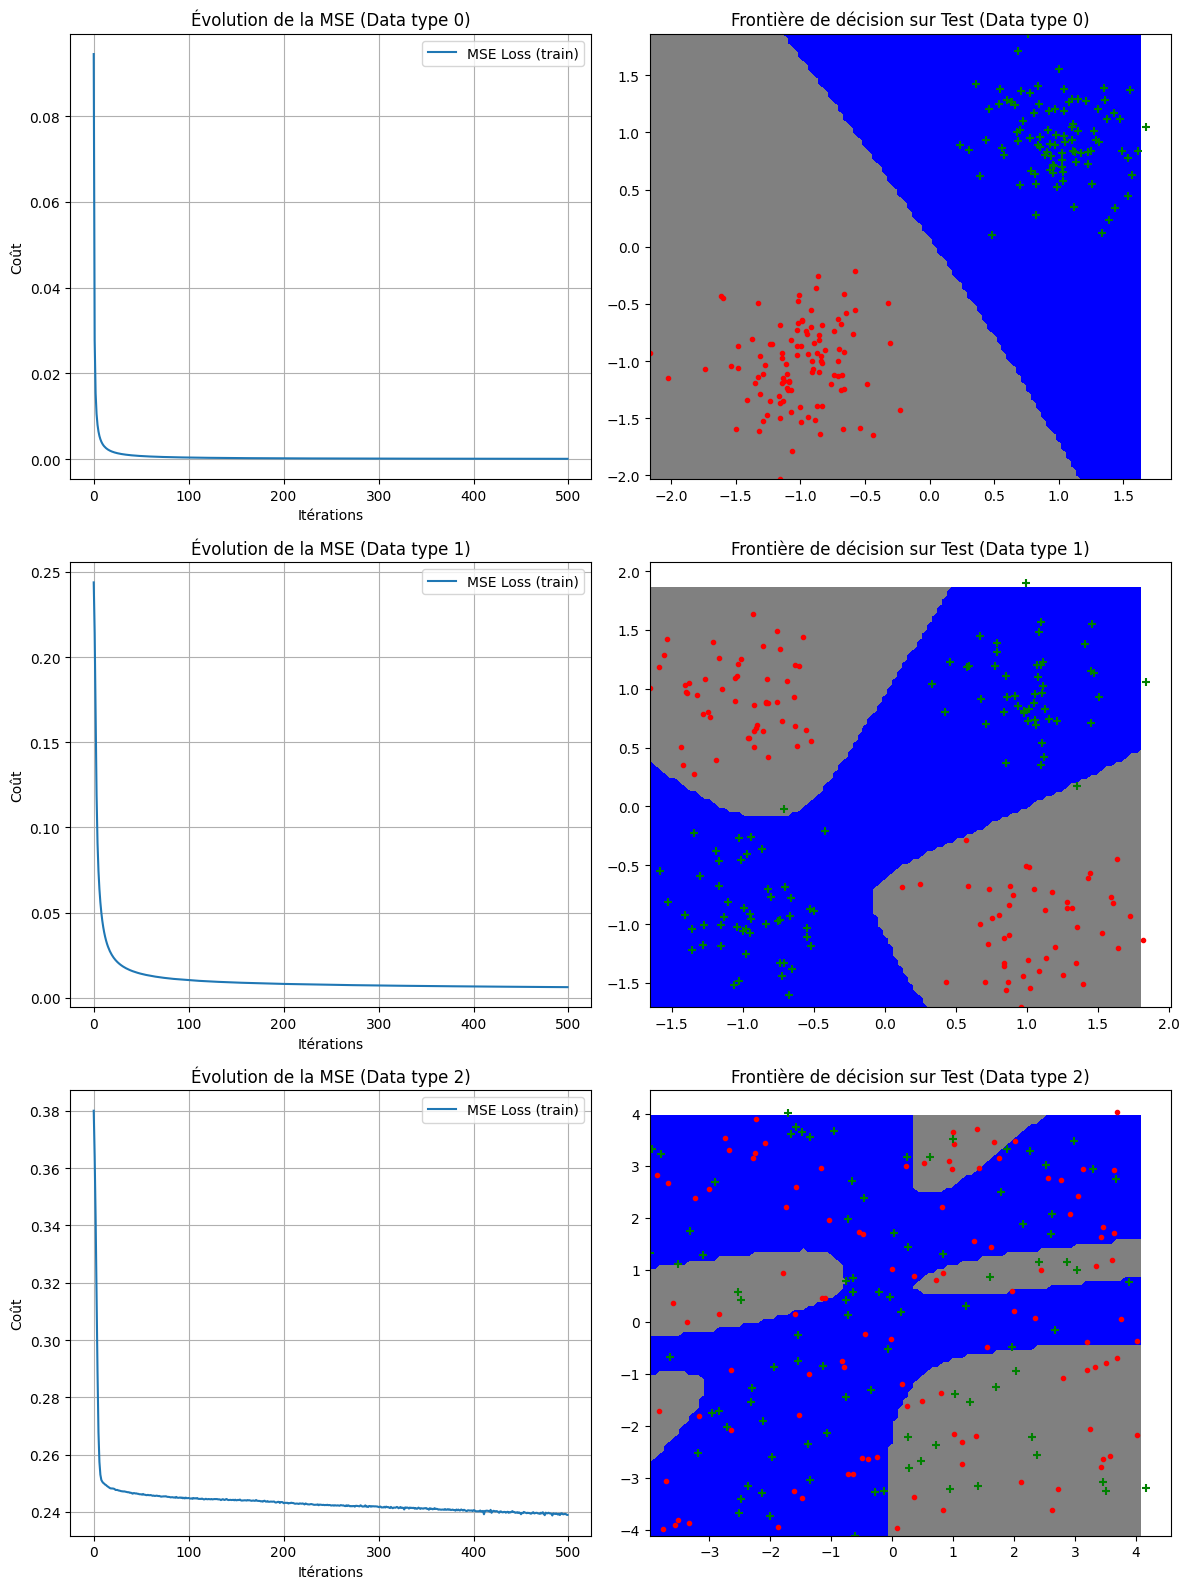

Figure combinée enregistrée dans : ../Rapport/Images\sigmoide_tanh_combined.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 16))

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay == -1, 0, 1).reshape((-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)

    model = SimpleNN(input_dim=2, hidden_dim=5, output_dim=1)
    loss = MSELoss()

    losses, trained_model = train_nn(X_train, y_train, model, loss, epochs=500, lr=0.05, batch_size=16)

    y_pred_test = trained_model.forward(X_test)
    test_loss = np.mean(loss.forward(y_test, y_pred_test))

    plt.subplot(3, 2, 2 * i + 1) 
    plt.plot(losses, label="MSE Loss (train)")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title(f"Évolution de la MSE (Data type {i})")
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)  
    plot_frontiere(X_test, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(X_test, y_test)
    plt.title(f"Frontière de décision sur Test (Data type {i})")

plt.tight_layout()

output_path = os.path.join(output_dir, "sigmoide_tanh_combined.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Figure combinée enregistrée dans : {output_path}")
